In [1]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy


from __future__ import print_function # use the print() function from Python3
from operator import add
from pylab import *
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
ms.use('seaborn-muted')         # fancy plot designs
import soundfile as sf
from numpy import random
from scipy import signal
import matplotlib.pyplot as plt
from statistics import mean 
import librosa
import scipy.io.wavfile as wavf
import pandas as pd
from tree_lib import *

In [2]:
df = pd.read_csv("all_features.csv")
df = df.drop(columns=['Unnamed: 0'])
list(df.columns.values)

['expression',
 'rating',
 'tempo',
 'avg_cent',
 'std_cent',
 'avg_rolloff',
 'std_rolloff',
 'avg_zcross',
 'std_zcross',
 'avg_flt',
 'std_flt',
 'avg_bw',
 'avg_ctr',
 'std_ctr',
 'height',
 'leaves',
 't-count',
 'operators',
 '2_powers',
 'avg_operand',
 'std_operand',
 'r(>>)',
 'r(*)',
 'r(&)',
 'r(^)',
 'r(%)',
 'r(|)',
 'r(-)',
 'r(+)',
 'r(/)',
 '>>',
 '*',
 '&',
 '^',
 '%',
 '|',
 '-',
 '+',
 '/']

In [3]:
df.describe()

,rating,tempo,avg_cent,std_cent,avg_rolloff,std_rolloff,avg_zcross,std_zcross,avg_flt,std_flt,...,r(/),>>,*,&,^,%,|,-,+,/
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.359000,107.475174,1314.805112,194.843208,2728.382263,319.682790,0.187200,0.067547,0.035699,0.015457,...,0.010000,2.095000,1.482000,1.90700,0.854000,0.314000,0.893000,0.313000,0.305000,0.044000
std,19.771622,55.341289,456.245882,120.445987,707.629992,242.779215,0.173810,0.076055,0.068509,0.024827,...,0.099549,1.139857,1.171772,1.17206,0.922787,0.567209,0.979035,0.577377,0.557033,0.210019
min,0.000000,0.000000,81.947177,5.276370,64.690498,0.180181,0.000003,0.000000,0.000012,0.000068,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,58.593750,956.551678,106.427512,2261.493870,149.418710,0.025734,0.008492,0.002481,0.002581,...,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,117.187500,1350.447493,163.167806,2920.900520,258.002237,0.132877,0.040105,0.009138,0.006057,...,0.000000,2.000000,1.000000,2.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,30.000000,117.187500,1669.193250,256.248571,3270.805570,437.533214,0.287021,0.104854,0.031822,0.015748,...,0.000000,3.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,100.000000,312.500000,3185.330203,833.474729,3999.383662,1454.644576,0.989808,0.476764,0.527401,0.227963,...,1.000000,7.000000,6.000000,7.00000,4.000000,3.000000,5.000000,3.000000,4.000000,2.000000


In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,rating,tempo,avg_cent,std_cent,avg_rolloff,std_rolloff,avg_zcross,std_zcross,avg_flt,std_flt,avg_bw,avg_ctr,std_ctr,height,leaves,t-count,operators,2_powers,avg_operand,std_operand,r(>>),r(*),r(&),r(^),r(%),r(|),r(-),r(+),r(/),>>,*,&,^,%,|,-,+,/
rating,1,0.0443342,0.0237432,0.329114,-0.00350456,0.25134,0.00768306,0.233309,-0.0199588,0.11371,-0.0749968,0.0243476,0.0252496,-0.0834008,0.0017987,-0.00773334,-0.00316583,-0.138505,0.176796,0.139846,-0.0931581,0.131567,0.0792075,-0.000157907,-0.0563614,-0.0361271,-0.0834279,-0.0408557,-0.0399691,0.112013,0.00142417,-0.0140651,-0.060383,-0.0174702,0.0785207,-0.114726,-0.0872076,-0.082877
tempo,0.0443342,1,-0.155278,0.0321973,-0.126201,0.129109,-0.136931,-0.101642,-0.0734461,-0.0638925,-0.0396133,-0.0202701,-0.0293409,-0.0485496,-0.0785762,-0.0475148,-0.0762549,0.0141119,0.0756102,0.0418574,-0.053448,-0.022281,0.149125,-0.061753,0.0359401,-0.0446086,-0.0703533,0.0308872,-0.000496274,-0.0453392,-0.125587,0.00695799,-0.0213786,0.0232157,-0.00403612,-0.0200186,0.0368837,-0.0156605
avg_cent,0.0237432,-0.155278,1,0.101766,0.933699,-0.347633,0.876147,0.498722,0.422792,0.370121,0.691742,-0.000562852,-0.0761317,0.0984909,0.156051,0.111976,0.161247,0.0130114,0.03113,0.0323406,0.0510508,0.273172,-0.204418,0.0197266,0.0302203,-0.117718,0.0252168,-0.00105468,-0.0282473,-0.0646267,0.367217,-0.00763781,0.0544925,0.085986,-0.0626866,0.0284176,0.0206592,0.000553759
std_cent,0.329114,0.0321973,0.101766,1,0.0708943,0.758175,0.164043,0.721714,-0.0165424,0.0878873,0.0256335,0.079022,0.201484,-0.0119024,0.0721424,-0.00186201,0.0446851,-0.0966051,0.0630393,0.017354,0.0219104,0.0996771,0.092447,0.00334884,-0.0223748,-0.11988,-0.116319,-0.0764578,-0.0177907,0.158087,0.054079,0.00853598,-0.0343871,-0.011618,0.0215934,-0.11856,-0.0856244,-0.0270356
avg_rolloff,-0.00350456,-0.126201,0.933699,0.0708943,1,-0.338654,0.729798,0.413392,0.333685,0.314136,0.863467,0.00840067,-0.09137,0.12761,0.149942,0.157188,0.182549,0.0381887,0.0106015,0.0198005,0.102742,0.197285,-0.179683,-0.0157809,0.0259725,-0.103084,0.0254621,0.0264621,-0.0354149,-0.0571128,0.339639,0.0595764,0.0332028,0.094135,-0.0539833,0.0375004,0.031053,-0.0230029
std_rolloff,0.25134,0.129109,-0.347633,0.758175,-0.338654,1,-0.206501,0.274419,-0.219548,-0.1245,-0.260109,0.112716,0.236548,-0.0182047,-0.00694816,-0.0132732,-0.0117939,-0.0687183,0.0662307,0.0256593,0.0253159,-0.0211499,0.168824,-0.0258111,-0.0315514,-0.0940159,-0.098124,-0.0546674,-0.00163742,0.168939,-0.114186,0.0607149,-0.0495102,-0.0725359,0.0357525,-0.111216,-0.0710568,-0.0216324
avg_zcross,0.00768306,-0.136931,0.876147,0.164043,0.729798,-0.206501,1,0.570685,0.384998,0.286552,0.477345,-0.0020923,-0.0150187,0.0384627,0.117556,-0.00291671,0.0728794,-0.00239878,0.0394291,0.0368051,0.0877993,0.318339,-0.248326,0.0311131,0.0071678,-0.0947541,-0.00612909,-0.0568439,-0.0214385,-0.0497542,0.276232,-0.0851907,0.0373102,0.0800947,-0.0504836,-0.0229632,-0.00854919,0.0348041
std_zcross,0.233309,-0.101642,0.498722,0.721714,0.413392,0.274419,0.570685,1,0.219221,0.285836,0.255505,0.00488507,0.0429826,0.0103961,0.109257,0.00345465,0.0711672,-0.0521099,0.025897,-0.00471197,0.0233634,0.16777,-0.0445449,0.0594829,-0.0163497,-0.11623,-0.0652788,-0.0580159,-0.00883098,0.0782868,0.163771,-0.0611972,0.034894,0.0341541,-0.0138615,-0.0550429,-0.0489961,-0.0280279
avg_flt,-0.0199588,-0.0734461,0.422792,-0.0165424,0.333685,-0.219548,0.384998,0.219221,1,0.735457,0.1217,-0.316024,-0.296665,0.0634756,0.0252762,0.093319,0.0679778,-0.00702992,0.0577037,0.0938173,-0.078695,0.245733,-0.190481,0.0558471,0.0926067,-0.081345,0.0155757,0.07557,0.0279317,0.0225788,0.164951,-0.15244,0.0520175,-0.0342849,0.0202275,-0.00664834,0.1241,0.0965512
std_flt,0.11371,-0.0638925,0.370121,0.0878873,0.314136,-0.1245,0.286552,0.285836,0.735457,1,0.144412,-0.202864,-0.15295,0.111123,0.0945097,0.161666,0.149911,-0.0400815,0.0839666,0.109738,-0.0762095,0.208626,-0.149149,0.0562398,0.18998,-0.0998417,0.00434654,0.051277,-0.0121706,0.119716,0.196808

In [5]:
df.head()

,expression,rating,tempo,avg_cent,std_cent,avg_rolloff,std_rolloff,avg_zcross,std_zcross,avg_flt,...,r(/),>>,*,&,^,%,|,-,+,/
0,(t^(t|11))^((t*12)&11),0,0.0,2397.742187,15.091598,3499.092151,18.751655,0.623013,0.018510,0.000018,...,0,0,1,1,2,0,1,0,0,0
1,t*(t/10),5,0.0,1967.835677,139.002189,3359.908049,107.338253,0.498658,0.056105,0.405539,...,0,0,1,0,0,0,0,0,0,1
2,(t|(t&7))*(t/8),5,0.0,1973.796906,123.739123,3380.505397,84.243555,0.498456,0.015501,0.297074,...,0,0,1,1,0,0,1,0,0,1
3,((t>>6)-(t^((t>>1)|5)))-((t>>4)&5),10,0.0,1090.473150,82.708608,2546.341951,161.222079,0.030035,0.003914,0.064719,...,0,3,0,1,1,0,1,2,0,0
4,(t*((3+(1^((t>>10)&5)))*(5+(3&(t>>14)))))>>((t...,80,0.0,1375.247172,125.774728,2883.745336,125.740283,0.127081,0.045806,0.094418,...,0,4,2,3,1,0,0,0,2,0


In [6]:
expressions = df["expression"]
#render_tups = render(expressions, 8000, 30)
#renderings = render_tups[0]

In [7]:
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_renderings = []
for test in renderings:
    test_arr = np.array(test)
    test_arr = np.array([test_arr])
    test_trans = scaler.fit_transform(test_arr.T)
    normalized_renderings.append(test_trans.T[0])

'''

    

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler(feature_range=(-1, 1))\nnormalized_renderings = []\nfor test in renderings:\n    test_arr = np.array(test)\n    test_arr = np.array([test_arr])\n    test_trans = scaler.fit_transform(test_arr.T)\n    normalized_renderings.append(test_trans.T[0])\n\n'

In [8]:
'''
with open('normalized_renderings.csv', 'w') as f:
    for item in normalized_renderings:
        f.write("%s\n" % list(item))

f.close()

'''




'\nwith open(\'normalized_renderings.csv\', \'w\') as f:\n    for item in normalized_renderings:\n        f.write("%s\n" % list(item))\n\nf.close()\n\n'

In [9]:
#IPython.display.Audio(normalized_renderings[378], rate=8000)

In [10]:
'''
expression_testing = []
for i in range(len(expressions)):
    print(i)
    y = np.array(normalized_renderings[i], dtype = 'f')
    sr = 8000
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

    onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
    o_env = librosa.onset.onset_strength(y, sr=sr)
    times = librosa.times_like(o_env, sr=sr)
    intervals = [times[0]]
    for i in range(1,len(times)):
        intervals.append(times[i] - times[i-1])
        

    z_cross = librosa.feature.zero_crossing_rate(y=y)
    avg_zcross = z_cross.mean()
    std_zcross = np.std(z_cross)
    
    flatness = librosa.feature.spectral_flatness(y=y)
    avg_flt = flatness.mean()
    std_flt = np.std(flatness)
    
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    avg_bw = spec_bw.mean()
    
    spec_ctr = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=4)
    avg_ctr = spec_ctr.mean()
    std_ctr = np.std(spec_ctr)
    
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    avg_cent = cent.mean()
    std_cent = np.std(cent)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
    avg_rolloff = rolloff.mean()
    std_rolloff = np.std(rolloff)
    
    expression_testing.append([tempo, avg_cent, std_cent, avg_rolloff, std_rolloff, avg_zcross, std_zcross, avg_flt, std_flt, avg_bw, avg_ctr, std_ctr])
    
'''

"\nexpression_testing = []\nfor i in range(len(expressions)):\n    print(i)\n    y = np.array(normalized_renderings[i], dtype = 'f')\n    sr = 8000\n    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)\n\n    onset_frames = librosa.onset.onset_detect(y=y, sr=sr)\n    o_env = librosa.onset.onset_strength(y, sr=sr)\n    times = librosa.times_like(o_env, sr=sr)\n    intervals = [times[0]]\n    for i in range(1,len(times)):\n        intervals.append(times[i] - times[i-1])\n        \n\n    z_cross = librosa.feature.zero_crossing_rate(y=y)\n    avg_zcross = z_cross.mean()\n    std_zcross = np.std(z_cross)\n    \n    flatness = librosa.feature.spectral_flatness(y=y)\n    avg_flt = flatness.mean()\n    std_flt = np.std(flatness)\n    \n    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)\n    avg_bw = spec_bw.mean()\n    \n    spec_ctr = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=4)\n    avg_ctr = spec_ctr.mean()\n    std_ctr = np.std(spec_ctr)\n    \n    cent = libr

In [11]:
#expression_testing = expression_testing[1:]

In [12]:
df = pd.DataFrame(expression_testing, columns = ['tempo', 'avg_cent', 'std_cent', 'avg_rolloff', 'std_rolloff', 'avg_zcross', 'std_zcross', 'avg_flt', 'std_flt', 'avg_bw', 'avg_ctr', 'std_ctr'])
df2 = pd.read_csv("ratings.csv")
df["rating"] = df2["cont_rating"]
df["expression"] = df2["expression"]

NameError: name 'expression_testing' is not defined

In [ ]:
df

In [13]:
df.describe()

,rating,tempo,avg_cent,std_cent,avg_rolloff,std_rolloff,avg_zcross,std_zcross,avg_flt,std_flt,...,r(/),>>,*,&,^,%,|,-,+,/
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.359000,107.475174,1314.805112,194.843208,2728.382263,319.682790,0.187200,0.067547,0.035699,0.015457,...,0.010000,2.095000,1.482000,1.90700,0.854000,0.314000,0.893000,0.313000,0.305000,0.044000
std,19.771622,55.341289,456.245882,120.445987,707.629992,242.779215,0.173810,0.076055,0.068509,0.024827,...,0.099549,1.139857,1.171772,1.17206,0.922787,0.567209,0.979035,0.577377,0.557033,0.210019
min,0.000000,0.000000,81.947177,5.276370,64.690498,0.180181,0.000003,0.000000,0.000012,0.000068,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,58.593750,956.551678,106.427512,2261.493870,149.418710,0.025734,0.008492,0.002481,0.002581,...,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,117.187500,1350.447493,163.167806,2920.900520,258.002237,0.132877,0.040105,0.009138,0.006057,...,0.000000,2.000000,1.000000,2.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,30.000000,117.187500,1669.193250,256.248571,3270.805570,437.533214,0.287021,0.104854,0.031822,0.015748,...,0.000000,3.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,100.000000,312.500000,3185.330203,833.474729,3999.383662,1454.644576,0.989808,0.476764,0.527401,0.227963,...,1.000000,7.000000,6.000000,7.00000,4.000000,3.000000,5.000000,3.000000,4.000000,2.000000


In [14]:

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,rating,tempo,avg_cent,std_cent,avg_rolloff,std_rolloff,avg_zcross,std_zcross,avg_flt,std_flt,avg_bw,avg_ctr,std_ctr,height,leaves,t-count,operators,2_powers,avg_operand,std_operand,r(>>),r(*),r(&),r(^),r(%),r(|),r(-),r(+),r(/),>>,*,&,^,%,|,-,+,/
rating,1,0.0443342,0.0237432,0.329114,-0.00350456,0.25134,0.00768306,0.233309,-0.0199588,0.11371,-0.0749968,0.0243476,0.0252496,-0.0834008,0.0017987,-0.00773334,-0.00316583,-0.138505,0.176796,0.139846,-0.0931581,0.131567,0.0792075,-0.000157907,-0.0563614,-0.0361271,-0.0834279,-0.0408557,-0.0399691,0.112013,0.00142417,-0.0140651,-0.060383,-0.0174702,0.0785207,-0.114726,-0.0872076,-0.082877
tempo,0.0443342,1,-0.155278,0.0321973,-0.126201,0.129109,-0.136931,-0.101642,-0.0734461,-0.0638925,-0.0396133,-0.0202701,-0.0293409,-0.0485496,-0.0785762,-0.0475148,-0.0762549,0.0141119,0.0756102,0.0418574,-0.053448,-0.022281,0.149125,-0.061753,0.0359401,-0.0446086,-0.0703533,0.0308872,-0.000496274,-0.0453392,-0.125587,0.00695799,-0.0213786,0.0232157,-0.00403612,-0.0200186,0.0368837,-0.0156605
avg_cent,0.0237432,-0.155278,1,0.101766,0.933699,-0.347633,0.876147,0.498722,0.422792,0.370121,0.691742,-0.000562852,-0.0761317,0.0984909,0.156051,0.111976,0.161247,0.0130114,0.03113,0.0323406,0.0510508,0.273172,-0.204418,0.0197266,0.0302203,-0.117718,0.0252168,-0.00105468,-0.0282473,-0.0646267,0.367217,-0.00763781,0.0544925,0.085986,-0.0626866,0.0284176,0.0206592,0.000553759
std_cent,0.329114,0.0321973,0.101766,1,0.0708943,0.758175,0.164043,0.721714,-0.0165424,0.0878873,0.0256335,0.079022,0.201484,-0.0119024,0.0721424,-0.00186201,0.0446851,-0.0966051,0.0630393,0.017354,0.0219104,0.0996771,0.092447,0.00334884,-0.0223748,-0.11988,-0.116319,-0.0764578,-0.0177907,0.158087,0.054079,0.00853598,-0.0343871,-0.011618,0.0215934,-0.11856,-0.0856244,-0.0270356
avg_rolloff,-0.00350456,-0.126201,0.933699,0.0708943,1,-0.338654,0.729798,0.413392,0.333685,0.314136,0.863467,0.00840067,-0.09137,0.12761,0.149942,0.157188,0.182549,0.0381887,0.0106015,0.0198005,0.102742,0.197285,-0.179683,-0.0157809,0.0259725,-0.103084,0.0254621,0.0264621,-0.0354149,-0.0571128,0.339639,0.0595764,0.0332028,0.094135,-0.0539833,0.0375004,0.031053,-0.0230029
std_rolloff,0.25134,0.129109,-0.347633,0.758175,-0.338654,1,-0.206501,0.274419,-0.219548,-0.1245,-0.260109,0.112716,0.236548,-0.0182047,-0.00694816,-0.0132732,-0.0117939,-0.0687183,0.0662307,0.0256593,0.0253159,-0.0211499,0.168824,-0.0258111,-0.0315514,-0.0940159,-0.098124,-0.0546674,-0.00163742,0.168939,-0.114186,0.0607149,-0.0495102,-0.0725359,0.0357525,-0.111216,-0.0710568,-0.0216324
avg_zcross,0.00768306,-0.136931,0.876147,0.164043,0.729798,-0.206501,1,0.570685,0.384998,0.286552,0.477345,-0.0020923,-0.0150187,0.0384627,0.117556,-0.00291671,0.0728794,-0.00239878,0.0394291,0.0368051,0.0877993,0.318339,-0.248326,0.0311131,0.0071678,-0.0947541,-0.00612909,-0.0568439,-0.0214385,-0.0497542,0.276232,-0.0851907,0.0373102,0.0800947,-0.0504836,-0.0229632,-0.00854919,0.0348041
std_zcross,0.233309,-0.101642,0.498722,0.721714,0.413392,0.274419,0.570685,1,0.219221,0.285836,0.255505,0.00488507,0.0429826,0.0103961,0.109257,0.00345465,0.0711672,-0.0521099,0.025897,-0.00471197,0.0233634,0.16777,-0.0445449,0.0594829,-0.0163497,-0.11623,-0.0652788,-0.0580159,-0.00883098,0.0782868,0.163771,-0.0611972,0.034894,0.0341541,-0.0138615,-0.0550429,-0.0489961,-0.0280279
avg_flt,-0.0199588,-0.0734461,0.422792,-0.0165424,0.333685,-0.219548,0.384998,0.219221,1,0.735457,0.1217,-0.316024,-0.296665,0.0634756,0.0252762,0.093319,0.0679778,-0.00702992,0.0577037,0.0938173,-0.078695,0.245733,-0.190481,0.0558471,0.0926067,-0.081345,0.0155757,0.07557,0.0279317,0.0225788,0.164951,-0.15244,0.0520175,-0.0342849,0.0202275,-0.00664834,0.1241,0.0965512
std_flt,0.11371,-0.0638925,0.370121,0.0878873,0.314136,-0.1245,0.286552,0.285836,0.735457,1,0.144412,-0.202864,-0.15295,0.111123,0.0945097,0.161666,0.149911,-0.0400815,0.0839666,0.109738,-0.0762095,0.208626,-0.149149,0.0562398,0.18998,-0.0998417,0.00434654,0.051277,-0.0121706,0.119716,0.196808

In [15]:
df.describe()
df.to_csv("Spectral_Features.csv")

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,rating,tempo,avg_cent,std_cent,avg_rolloff,std_rolloff,avg_zcross,std_zcross,avg_flt,std_flt,avg_bw,avg_ctr,std_ctr,height,leaves,t-count,operators,2_powers,avg_operand,std_operand,r(>>),r(*),r(&),r(^),r(%),r(|),r(-),r(+),r(/),>>,*,&,^,%,|,-,+,/
rating,1,0.0443342,0.0237432,0.329114,-0.00350456,0.25134,0.00768306,0.233309,-0.0199588,0.11371,-0.0749968,0.0243476,0.0252496,-0.0834008,0.0017987,-0.00773334,-0.00316583,-0.138505,0.176796,0.139846,-0.0931581,0.131567,0.0792075,-0.000157907,-0.0563614,-0.0361271,-0.0834279,-0.0408557,-0.0399691,0.112013,0.00142417,-0.0140651,-0.060383,-0.0174702,0.0785207,-0.114726,-0.0872076,-0.082877
tempo,0.0443342,1,-0.155278,0.0321973,-0.126201,0.129109,-0.136931,-0.101642,-0.0734461,-0.0638925,-0.0396133,-0.0202701,-0.0293409,-0.0485496,-0.0785762,-0.0475148,-0.0762549,0.0141119,0.0756102,0.0418574,-0.053448,-0.022281,0.149125,-0.061753,0.0359401,-0.0446086,-0.0703533,0.0308872,-0.000496274,-0.0453392,-0.125587,0.00695799,-0.0213786,0.0232157,-0.00403612,-0.0200186,0.0368837,-0.0156605
avg_cent,0.0237432,-0.155278,1,0.101766,0.933699,-0.347633,0.876147,0.498722,0.422792,0.370121,0.691742,-0.000562852,-0.0761317,0.0984909,0.156051,0.111976,0.161247,0.0130114,0.03113,0.0323406,0.0510508,0.273172,-0.204418,0.0197266,0.0302203,-0.117718,0.0252168,-0.00105468,-0.0282473,-0.0646267,0.367217,-0.00763781,0.0544925,0.085986,-0.0626866,0.0284176,0.0206592,0.000553759
std_cent,0.329114,0.0321973,0.101766,1,0.0708943,0.758175,0.164043,0.721714,-0.0165424,0.0878873,0.0256335,0.079022,0.201484,-0.0119024,0.0721424,-0.00186201,0.0446851,-0.0966051,0.0630393,0.017354,0.0219104,0.0996771,0.092447,0.00334884,-0.0223748,-0.11988,-0.116319,-0.0764578,-0.0177907,0.158087,0.054079,0.00853598,-0.0343871,-0.011618,0.0215934,-0.11856,-0.0856244,-0.0270356
avg_rolloff,-0.00350456,-0.126201,0.933699,0.0708943,1,-0.338654,0.729798,0.413392,0.333685,0.314136,0.863467,0.00840067,-0.09137,0.12761,0.149942,0.157188,0.182549,0.0381887,0.0106015,0.0198005,0.102742,0.197285,-0.179683,-0.0157809,0.0259725,-0.103084,0.0254621,0.0264621,-0.0354149,-0.0571128,0.339639,0.0595764,0.0332028,0.094135,-0.0539833,0.0375004,0.031053,-0.0230029
std_rolloff,0.25134,0.129109,-0.347633,0.758175,-0.338654,1,-0.206501,0.274419,-0.219548,-0.1245,-0.260109,0.112716,0.236548,-0.0182047,-0.00694816,-0.0132732,-0.0117939,-0.0687183,0.0662307,0.0256593,0.0253159,-0.0211499,0.168824,-0.0258111,-0.0315514,-0.0940159,-0.098124,-0.0546674,-0.00163742,0.168939,-0.114186,0.0607149,-0.0495102,-0.0725359,0.0357525,-0.111216,-0.0710568,-0.0216324
avg_zcross,0.00768306,-0.136931,0.876147,0.164043,0.729798,-0.206501,1,0.570685,0.384998,0.286552,0.477345,-0.0020923,-0.0150187,0.0384627,0.117556,-0.00291671,0.0728794,-0.00239878,0.0394291,0.0368051,0.0877993,0.318339,-0.248326,0.0311131,0.0071678,-0.0947541,-0.00612909,-0.0568439,-0.0214385,-0.0497542,0.276232,-0.0851907,0.0373102,0.0800947,-0.0504836,-0.0229632,-0.00854919,0.0348041
std_zcross,0.233309,-0.101642,0.498722,0.721714,0.413392,0.274419,0.570685,1,0.219221,0.285836,0.255505,0.00488507,0.0429826,0.0103961,0.109257,0.00345465,0.0711672,-0.0521099,0.025897,-0.00471197,0.0233634,0.16777,-0.0445449,0.0594829,-0.0163497,-0.11623,-0.0652788,-0.0580159,-0.00883098,0.0782868,0.163771,-0.0611972,0.034894,0.0341541,-0.0138615,-0.0550429,-0.0489961,-0.0280279
avg_flt,-0.0199588,-0.0734461,0.422792,-0.0165424,0.333685,-0.219548,0.384998,0.219221,1,0.735457,0.1217,-0.316024,-0.296665,0.0634756,0.0252762,0.093319,0.0679778,-0.00702992,0.0577037,0.0938173,-0.078695,0.245733,-0.190481,0.0558471,0.0926067,-0.081345,0.0155757,0.07557,0.0279317,0.0225788,0.164951,-0.15244,0.0520175,-0.0342849,0.0202275,-0.00664834,0.1241,0.0965512
std_flt,0.11371,-0.0638925,0.370121,0.0878873,0.314136,-0.1245,0.286552,0.285836,0.735457,1,0.144412,-0.202864,-0.15295,0.111123,0.0945097,0.161666,0.149911,-0.0400815,0.0839666,0.109738,-0.0762095,0.208626,-0.149149,0.0562398,0.18998,-0.0998417,0.00434654,0.051277,-0.0121706,0.119716,0.196808

In [17]:
from sklearn import preprocessing



In [18]:
df = pd.read_csv("all_features.csv")
df = df.drop(columns=['Unnamed: 0'])
list(df.columns.values)


['expression',
 'rating',
 'tempo',
 'avg_cent',
 'std_cent',
 'avg_rolloff',
 'std_rolloff',
 'avg_zcross',
 'std_zcross',
 'avg_flt',
 'std_flt',
 'avg_bw',
 'avg_ctr',
 'std_ctr',
 'height',
 'leaves',
 't-count',
 'operators',
 '2_powers',
 'avg_operand',
 'std_operand',
 'r(>>)',
 'r(*)',
 'r(&)',
 'r(^)',
 'r(%)',
 'r(|)',
 'r(-)',
 'r(+)',
 'r(/)',
 '>>',
 '*',
 '&',
 '^',
 '%',
 '|',
 '-',
 '+',
 '/']

In [19]:
def classif(col):
    if col['rating'] > 40:
        return 1
    else:
        return 0

In [20]:
#df['class'] = df.apply(classif, axis = 1)

In [36]:
X = df[['tempo',
 'avg_cent',
 'std_cent',
 'avg_rolloff',
 'std_rolloff',
 'avg_zcross',
 'std_zcross',
 'avg_flt',
 'std_flt',
 'avg_bw',
 'avg_ctr',
 'std_ctr',
 'height',
 'leaves',
 't-count',
 'operators',
 '2_powers',
 'avg_operand',
 'std_operand']]
y = df[['rating']]


In [37]:
df.describe()

,rating,tempo,avg_cent,std_cent,avg_rolloff,std_rolloff,avg_zcross,std_zcross,avg_flt,std_flt,...,r(/),>>,*,&,^,%,|,-,+,/
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.359000,107.475174,1314.805112,194.843208,2728.382263,319.682790,0.187200,0.067547,0.035699,0.015457,...,0.010000,2.095000,1.482000,1.90700,0.854000,0.314000,0.893000,0.313000,0.305000,0.044000
std,19.771622,55.341289,456.245882,120.445987,707.629992,242.779215,0.173810,0.076055,0.068509,0.024827,...,0.099549,1.139857,1.171772,1.17206,0.922787,0.567209,0.979035,0.577377,0.557033,0.210019
min,0.000000,0.000000,81.947177,5.276370,64.690498,0.180181,0.000003,0.000000,0.000012,0.000068,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,58.593750,956.551678,106.427512,2261.493870,149.418710,0.025734,0.008492,0.002481,0.002581,...,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,117.187500,1350.447493,163.167806,2920.900520,258.002237,0.132877,0.040105,0.009138,0.006057,...,0.000000,2.000000,1.000000,2.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,30.000000,117.187500,1669.193250,256.248571,3270.805570,437.533214,0.287021,0.104854,0.031822,0.015748,...,0.000000,3.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,100.000000,312.500000,3185.330203,833.474729,3999.383662,1454.644576,0.989808,0.476764,0.527401,0.227963,...,1.000000,7.000000,6.000000,7.00000,4.000000,3.000000,5.000000,3.000000,4.000000,2.000000


In [28]:
import torch

dtype = torch.float
device = torch.device("cpu")

N, D_in, H, D_out = 1000, 21, 10, 1 #4

train_size = 800
test_size = N - train_size

x = torch.from_numpy(np.array(X, dtype = 'f')).float()
y = torch.from_numpy(np.array(y, dtype = 'f')).float()


In [29]:
print(y.size())
print(x.size())
print(train_size)
print(test_size)

torch.Size([1000, 1])
torch.Size([1000, 19])
800
200


In [30]:
hidden = 10
for H in range(hidden, hidden+1):
    N, D_in, H1, D_out = 1000, 19, H, 1 #4
    t_loss = []
    v_loss = []
    for i in range(1):
        loss_dic = {'train': [], 'validation': []}
        train_dataset, test_dataset = torch.utils.data.random_split(torch.cat((x, y), 1), [train_size, test_size])
        X_train = train_dataset.dataset[train_dataset.indices][:, :D_in]
        X_test = test_dataset.dataset[test_dataset.indices][:, :D_in]
        y_train = train_dataset.dataset[train_dataset.indices][:, D_in: D_in + D_out]
        y_test = test_dataset.dataset[test_dataset.indices][:, D_in:D_in + D_out]

        scaler = preprocessing.StandardScaler()
        X_train = torch.from_numpy(scaler.fit_transform(X_train.numpy()))
        X_test = torch.from_numpy(scaler.transform(X_test.numpy()))

        model = torch.nn.Sequential(
            torch.nn.Linear(D_in, H1, bias=False),
            torch.nn.ReLU(),
            torch.nn.Linear(H1, D_out, bias=False),
        )

        torch.nn.init.normal_(model[0].weight)
        torch.nn.init.normal_(model[2].weight)


        mse = torch.nn.MSELoss(reduction='sum')
        #l1 = torch.nn.L1Loss(reduction='sum')
        
        learning_rate = 1e-6
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

        loss_dic['train'] = []
        loss_dic['validation'] = []
        torch.nn.init.normal_(model[0].weight)
        torch.nn.init.normal_(model[2].weight)
        for t in range(10000):

            y_pred = model(X_train)
            
            loss = mse(y_pred, y_train)
            #loss = l1(y_pred, y_train)
            
            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            y_validation_pred = model(X_test)

            loss_validation = mse(y_validation_pred, y_test)
            #loss_validation = l1(y_validation_pred, y_test)
            
            loss_dic['train'].append(loss / train_size)
            loss_dic['validation'].append(loss_validation / test_size)

            if t == 9999:
                print(y_pred[337])
                t_loss.append(loss.item() / train_size)
                v_loss.append(loss_validation.item() / test_size)
                print(t, loss.item() / train_size, loss_validation.item() / test_size)
    v_loss = np.array(v_loss)
    t_loss = np.array(t_loss)
    print("%d: Train loss: %d ~ %d, Test loss: %d ~ %d" % (H, t_loss.mean(), np.std(t_loss), v_loss.mean(), np.std(v_loss)))

tensor([9.0887], grad_fn=<SelectBackward>)
9999 195.7638671875 344.225625
10: Test loss: 195 ~ 0, Val loss: 344 ~ 0


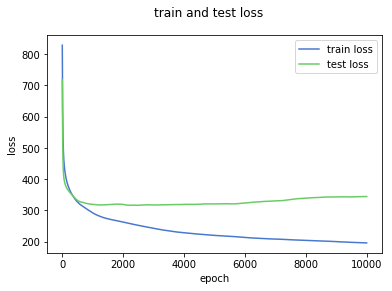

In [31]:
plt.plot([x for x in range(10000)], loss_dic['train'], label = "train loss")
plt.plot([x for x in range(10000)], loss_dic['validation'], label = "test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.suptitle("train and test loss")
plt.legend();

In [32]:
df2 = df
X = df2[['tempo', 'avg_cent', 'std_cent', 'avg_rolloff', 'std_rolloff', 'avg_zcross', 'std_zcross', 'avg_flt', 'std_flt', 'avg_bw', 'avg_ctr', 'std_ctr']]
X = torch.from_numpy(scaler.transform(np.array(X, dtype = 'f'))).float()
df2["predicted"] = model(X).detach().numpy()
len(df2)

ValueError: operands could not be broadcast together with shapes (1000,12) (19,) (1000,12) 

In [ ]:
df2.sort_values(by=['predicted'])

In [33]:
for H in range(8,9):
    N, D_in, H1, H2, D_out = 500, 12, H, 2, 1 #4
    t_loss = []
    v_loss = []
    for i in range(2):
        loss_dic = {'train': [], 'validation': []}
        train_dataset, test_dataset = torch.utils.data.random_split(torch.cat((x, y), 1), [train_size, test_size])
        X_train = train_dataset.dataset[train_dataset.indices][:, :D_in]
        X_test = test_dataset.dataset[test_dataset.indices][:, :D_in]
        y_train = train_dataset.dataset[train_dataset.indices][:, D_in: D_in + D_out]
        y_test = test_dataset.dataset[test_dataset.indices][:, D_in:D_in + D_out]

        scaler = preprocessing.StandardScaler()
        X_train = torch.from_numpy(scaler.fit_transform(X_train.numpy()))
        X_test = torch.from_numpy(scaler.transform(X_test.numpy()))

        model = torch.nn.Sequential(
            torch.nn.Linear(D_in, H1, bias=False),
            torch.nn.ReLU(),
            torch.nn.Linear(H1, H2, bias=False),
            torch.nn.ReLU(),
            torch.nn.Linear(H2, D_out, bias=False),
        )

        torch.nn.init.normal_(model[0].weight)
        torch.nn.init.normal_(model[2].weight)


        mse = torch.nn.MSELoss(reduction='sum')
        #l1 = torch.nn.L1Loss(reduction='sum')
        
        learning_rate = 1e-6
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

        loss_dic['train'] = []
        loss_dic['validation'] = []
        torch.nn.init.normal_(model[0].weight)
        torch.nn.init.normal_(model[2].weight)
        for t in range(10000):

            y_pred = model(X_train)

            loss = mse(y_pred, y_train)
            #loss = l1(y_pred, y_train)
            
            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            y_validation_pred = model(X_test)

            loss_validation = mse(y_validation_pred, y_test)
            #loss_validation = l1(y_validation_pred, y_test)
            
            loss_dic['train'].append(loss / train_size)
            loss_dic['validation'].append(loss_validation / test_size)

            if t == 9999:
                t_loss.append(loss.item() / train_size)
                v_loss.append(loss_validation.item() / test_size)
                #print(t, loss.item() / train_size, loss_validation.item() / test_size)
    v_loss = np.array(v_loss)
    t_loss = np.array(t_loss)
    print("%d: Test loss: %d ~ %d, Val loss: %d ~ %d" % (H, t_loss.mean(), np.std(t_loss), v_loss.mean(), np.std(v_loss)))

8: Test loss: 2 ~ 0, Val loss: 3 ~ 0


In [34]:
for H in range(11,13):
    N, D_in, H, D_out = 500, 12, H, 1 #4
    t_loss = []
    v_loss = []
    for i in range(5):
        loss_dic = {'train': [], 'validation': []}

        train_dataset, test_dataset = torch.utils.data.random_split(torch.cat((x, y), 1), [train_size, test_size])
        X_train = train_dataset.dataset[train_dataset.indices][:, :D_in]
        X_test = test_dataset.dataset[test_dataset.indices][:, :D_in]
        y_train = train_dataset.dataset[train_dataset.indices][:, D_in: D_in + D_out]
        y_test = test_dataset.dataset[test_dataset.indices][:, D_in:D_in + D_out]

        scaler = preprocessing.StandardScaler()
        X_train = torch.from_numpy(scaler.fit_transform(X_train.numpy()))
        X_test = torch.from_numpy(scaler.transform(X_test.numpy()))

        model = torch.nn.Sequential(
            torch.nn.Linear(D_in, H, bias=False),
            torch.nn.ReLU(),
            torch.nn.Linear(H, D_out, bias=False),
        )

        torch.nn.init.normal_(model[0].weight)
        torch.nn.init.normal_(model[2].weight)


        mse = torch.nn.MSELoss(reduction='sum')
        #l1 = torch.nn.L1Loss(reduction='sum')
        
        learning_rate = 1e-6
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

        loss_dic['train'] = []
        loss_dic['validation'] = []
        torch.nn.init.normal_(model[0].weight)
        torch.nn.init.normal_(model[2].weight)
        for t in range(10000):

            y_pred = model(X_train)

            loss = mse(y_pred, y_train)
            #loss = l1(y_pred, y_train)
            
            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            y_validation_pred = model(X_test)

            loss_validation = mse(y_validation_pred, y_test)
            #loss_validation = l1(y_validation_pred, y_test)
            
            loss_dic['train'].append(loss / train_size)
            loss_dic['validation'].append(loss_validation / test_size)

            if t == 9999:
                t_loss.append(loss.item() / train_size)
                v_loss.append(loss_validation.item() / test_size)
                #print(t, loss.item() / train_size, loss_validation.item() / test_size)
    v_loss = np.array(v_loss)
    t_loss = np.array(t_loss)
    print("%d: Test loss: %d ~ %d, Val loss: %d ~ %d" % (H, t_loss.mean(), np.std(t_loss), v_loss.mean(), np.std(v_loss)))

11: Test loss: 2 ~ 0, Val loss: 2 ~ 0
12: Test loss: 2 ~ 0, Val loss: 2 ~ 0


In [ ]:
v_loss = np.array(v_loss)
t_loss = np.array(t_loss)
print("Test loss: %d ~ %d, Val loss: %d ~ %d" % (t_loss.mean(), np.std(t_loss), v_loss.mean(), np.std(v_loss)))

In [35]:
y_pred

tensor([[5.0382],
        [4.1161],
        [5.6814],
        [5.9019],
        [3.9092],
        [6.4554],
        [5.6884],
        [6.1018],
        [4.0732],
        [6.9169],
        [6.8727],
        [5.9131],
        [3.7792],
        [4.4908],
        [5.7493],
        [5.0409],
        [3.6519],
        [4.3336],
        [5.1230],
        [3.6486],
        [5.8241],
        [4.6632],
        [4.5813],
        [5.1026],
        [3.1492],
        [5.3987],
        [3.2479],
        [4.7525],
        [6.6561],
        [4.4282],
        [4.3715],
        [3.3098],
        [4.0730],
        [4.5641],
        [4.2152],
        [4.5769],
        [4.6181],
        [4.5313],
        [4.7394],
        [3.1405],
        [4.9724],
        [5.3407],
        [4.0351],
        [5.2975],
        [4.3150],
        [5.3032],
        [5.1581],
        [4.6925],
        [5.2586],
        [4.6377],
        [4.5792],
        [3.9252],
        [3.9856],
        [3.5675],
        [4.2166],
        [6

In [ ]:
plt.plot([x for x in range(10000)], loss_dic['train'], label = "train loss")
plt.plot([x for x in range(10000)], loss_dic['validation'], label = "test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.suptitle("train and test loss")
plt.legend();

In [53]:
y_validation_pred = model(X_test)

NameError: name 'model' is not defined

In [54]:
df2 = pd.read_csv("spectral_data2.csv")
X = df2[['tempo', 'avg_cent', 'std_cent', 'avg_rolloff', 'std_rolloff', 'avg_zcross', 'std_zcross', 'avg_flt', 'std_flt', 'avg_bw', 'avg_ctr', 'std_ctr']]
y = df2["cont_rating"]

FileNotFoundError: File b'spectral_data2.csv' does not exist

In [55]:
y_pred = model(torch.from_numpy(scaler.transform(np.array(X, dtype = 'f'))))

NameError: name 'model' is not defined

In [ ]:
y_pred.detach().numpy()

In [56]:
df2["y_pred"] = y_pred.detach().numpy()

NameError: name 'y_pred' is not defined

In [57]:
df2.describe()


NameError: name 'df2' is not defined

In [ ]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

In [58]:
df2.head()

NameError: name 'df2' is not defined